# Data Visualization
Author: NathalyKeith

Objective: Create clear, reproducible visual summaries of biomedical datasets.
This notebook contains synthetic data examples and visualization templates you can reuse.

In [1]:
# Imports and plotting styles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")
%matplotlib inline

In [2]:
# Synthetic gene expression dataset with groups and samples
np.random.seed(42)
genes = ['TP53','BRCA1','BRCA2','EGFR','MYC']
groups = ['Control','Treatment']
rows = []
for gene in genes:
    for g in groups:
        for i in range(40):  # 40 samples per group
            expr = np.random.lognormal(mean=2 + (0.2 if g=='Treatment' and gene in ['TP53','MYC'] else 0),
                                      sigma=0.4)
            rows.append({'Gene': gene, 'Group': g, 'Expression': expr})
data = pd.DataFrame(rows)
data.head()

,Gene,Group,Expression
0,TP53,Control,9.013159
1,TP53,Control,6.991494
2,TP53,Control,9.574233
3,TP53,Control,13.588338
4,TP53,Control,6.728409


## Summary statistics
We will show group-wise summary (mean, median) and visual comparisons using boxplots and violin plots.

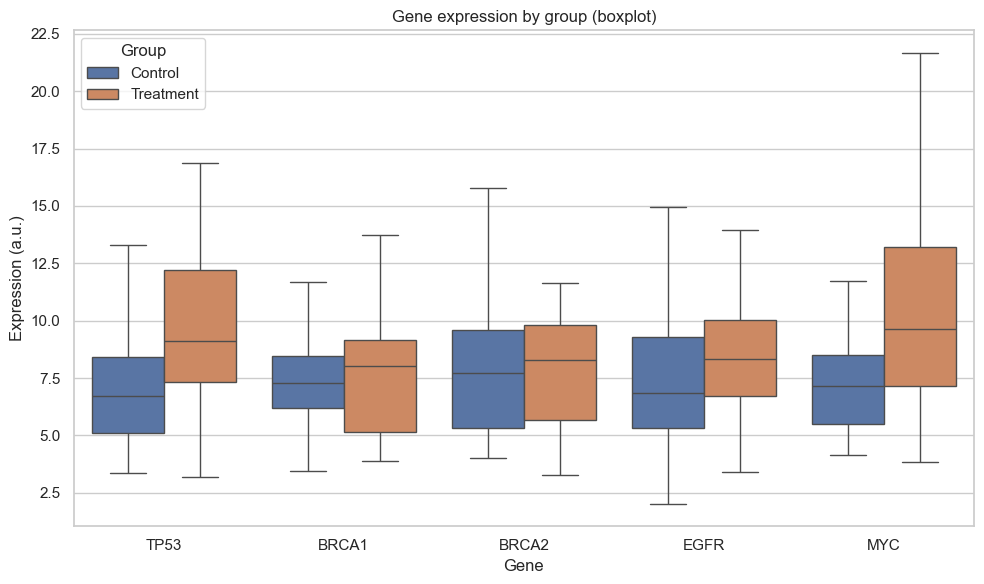

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gene', y='Expression', hue='Group', data=data, showfliers=False)
plt.title('Gene expression by group (boxplot)')
plt.ylabel('Expression (a.u.)')
plt.xlabel('Gene')
plt.legend(title='Group')
plt.tight_layout()

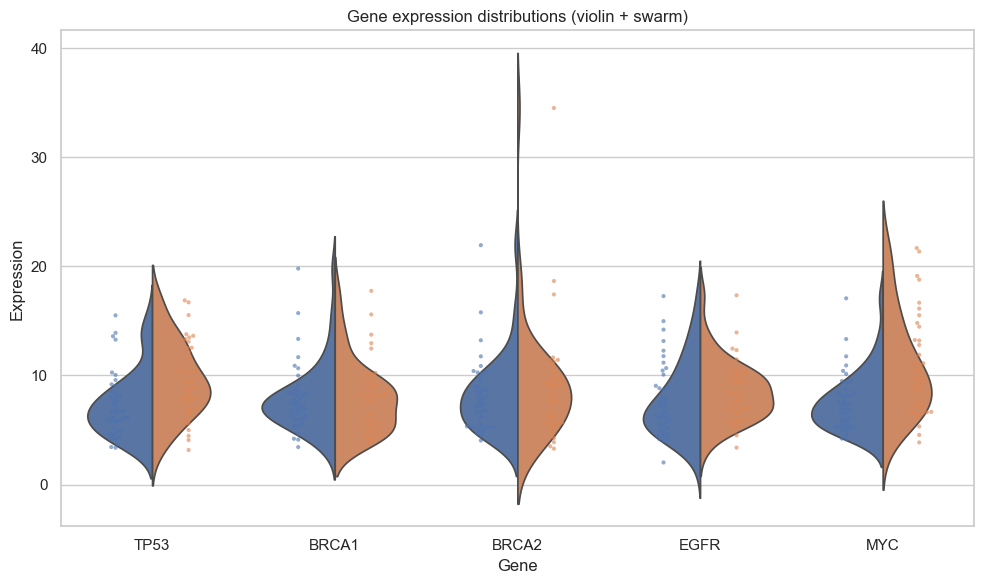

In [5]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Gene', y='Expression', hue='Group', data=data, split=True, inner=None)
sns.swarmplot(x='Gene', y='Expression', hue='Group', data=data, dodge=True, size=3, alpha=0.6)
plt.title('Gene expression distributions (violin + swarm)')
plt.legend([],[], frameon=False)  # remove duplicate legend
plt.tight_layout()

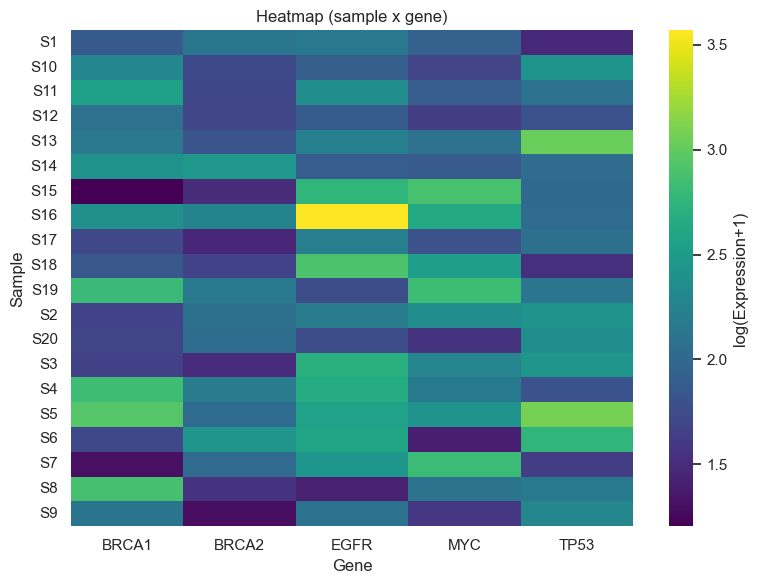

In [6]:
# Build example sample x gene matrix for heatmap
# create sample IDs
sample_rows = []
for i in range(20):
    for gene in genes:
        sample_rows.append({'Sample': f'S{i+1}', 'Gene': gene, 'Expression': np.random.lognormal(mean=2, sigma=0.5)})
df_samples = pd.DataFrame(sample_rows)
mat = df_samples.pivot(index='Sample', columns='Gene', values='Expression')
plt.figure(figsize=(8,6))
sns.heatmap(np.log1p(mat), cmap='viridis', cbar_kws={'label':'log(Expression+1)'})
plt.title('Heatmap (sample x gene)')
plt.tight_layout()

## Final notes
- These templates are reusable for real datasets: replace synthetic data with your pandas DataFrame.
- Before plotting, consider normalization and log-transformation for RNA expression data.